# Activation Function - تابع فعال‌سازی

    تابع فعال‌سازی تصمیم می‌گیرد که آیا خروجی یک نورون به لایه پنهان بعدی منتقل شود یا خیر

    با معرفی توابع فعال‌سازی غیرخطی , شبکه می‌تواند روابط غیرخطی را در داده یاد بگیرد

> 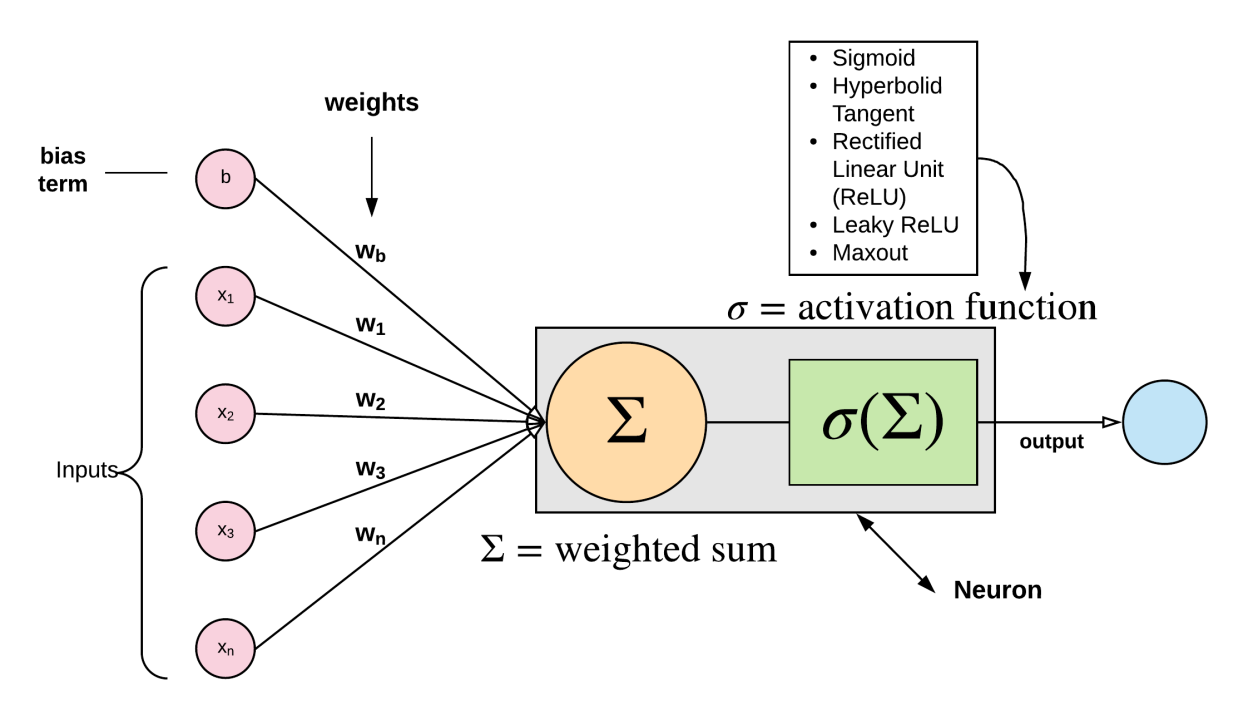

## Non-linear Activation Functions

### Best for Last Layer
1. #### Sigmoid / Logistic
       torch.nn.Sigmoid()
    >BEST FOR :   binary classification
    >
    >  An Activation Function decides whether a neuron's output is not passed on to the next layer.
    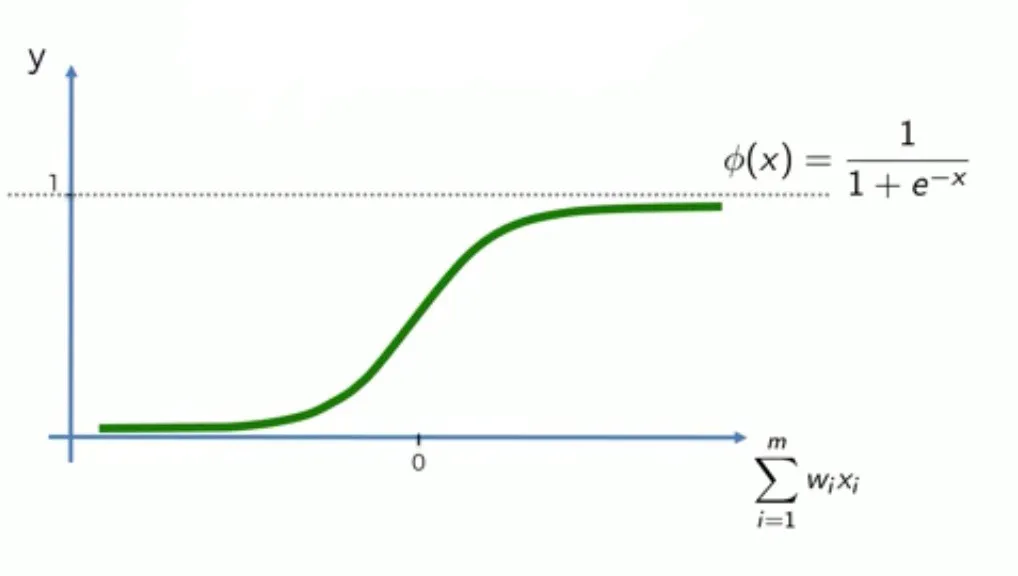

2. #### Softmax
       torch.nn.Softmax()
    >BEST FOR : last layer - multi-class classification
    >
    > The Softmax function extends the concept of the sigmoid function to handle multiple classes
    >
    > Softmax is an activation function that scales numbers/logits into probabilities.
    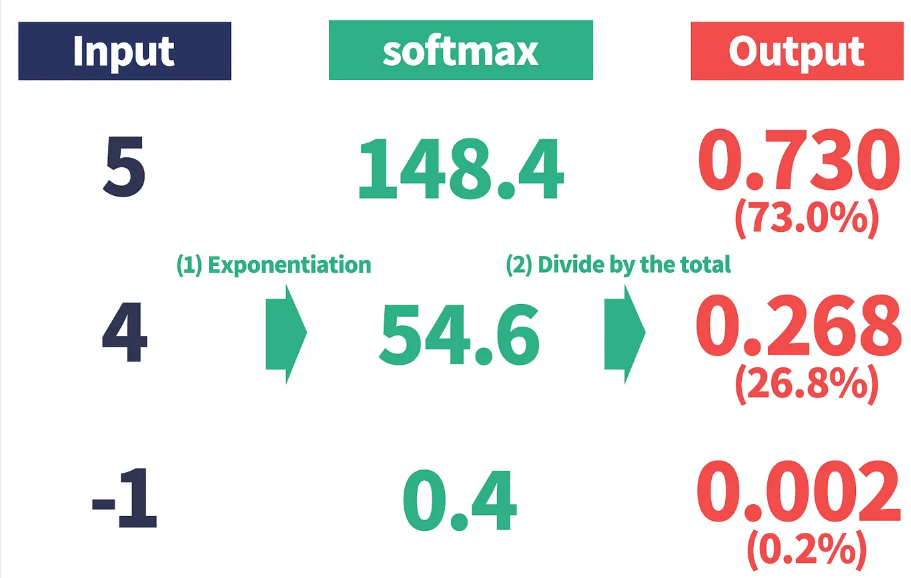

### Best for Hidden Layer

1. #### ReLU (Rectified Linear Unit)
       torch.nn.ReLU()
    >BEST FOR : hidden layers
    >
    >ReLU has a derivative function and allows for backpropagation while simultaneously making it computationally efficient
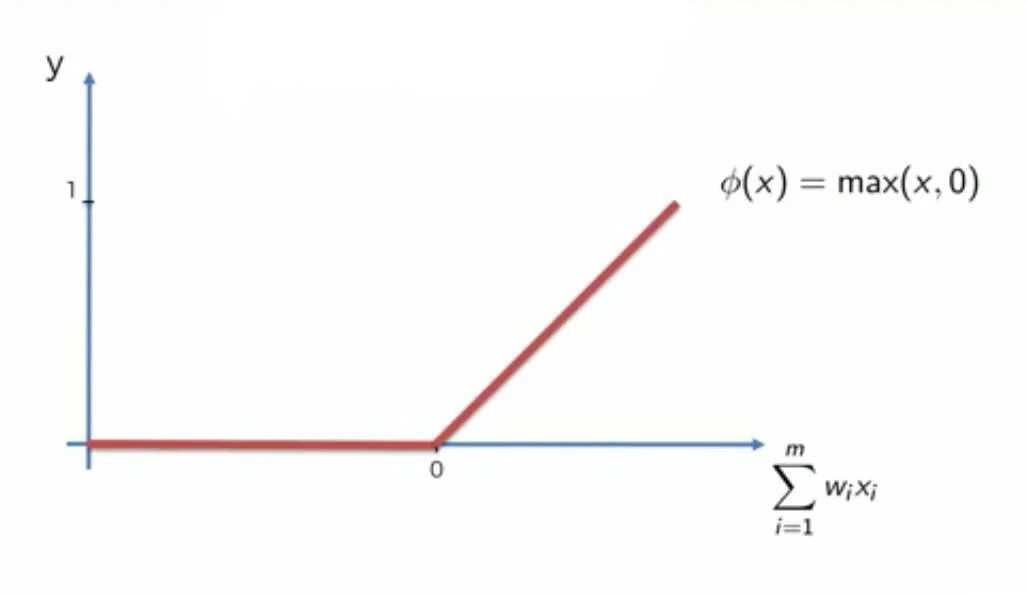
    >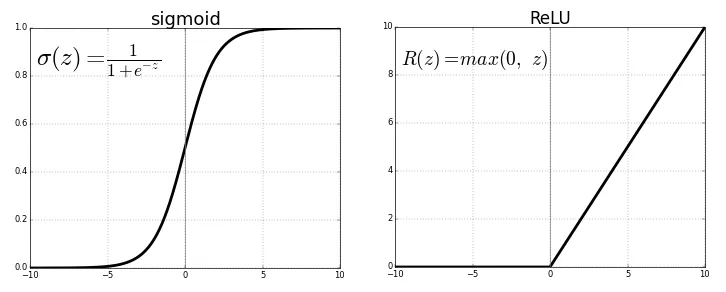 
3. #### Leaky ReLU
       torch.nn.LeakyReLU()
    >BEST FOR : hidden layers
    >
    >improved version if ReLU. solves for vanishing gradient problem
    > 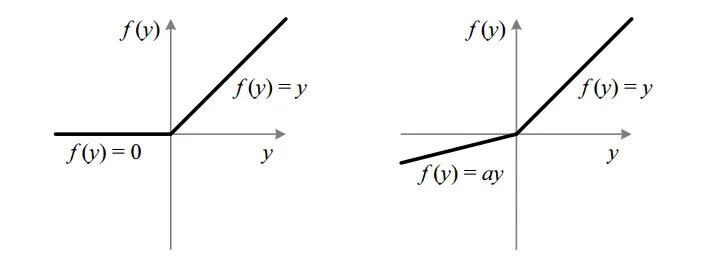 
5. #### SELU (Scaled Exponential Linear Unit)
   >BEST FOR : hidden layers
   >
   >SELU was defined in self-normalizing networks and takes care of internal normalization which means each layer preserves the mean and variance from the previous layers.
    
6. #### GELU (Gaussian Error Linear Unit)
    >BEST FOR : hidden layers
    >
    >It is compatible with BERT, ROBERTa, ALBERT, and other top NLP models
    >GELU nonlinearity is better than ReLU and ELU activations and finds performance improvements across all tasks in domains of computer vision, natural language processing, and speech recognition.
    
7. #### ELU (Exponential Linear Units)
    >BEST FOR : hidden layers
    >
    >It is a self-gated activation function developed by researchers 
8. #### PReLU (Parametric ReLU Function)
    >BEST FOR : hidden layers
    >
    >Parametric ReLU is another variant of ReLU that aims to solve the problem of gradient’s becoming zero for the left half of the axis.


9. #### Tanh (hyperbolic tangent)
    >used in hidden layers
    >
    >Tanh function is very similar to the sigmoid/logistic activation function, and even has the same S-shape with the difference in output range of -1 to 1
    >
    >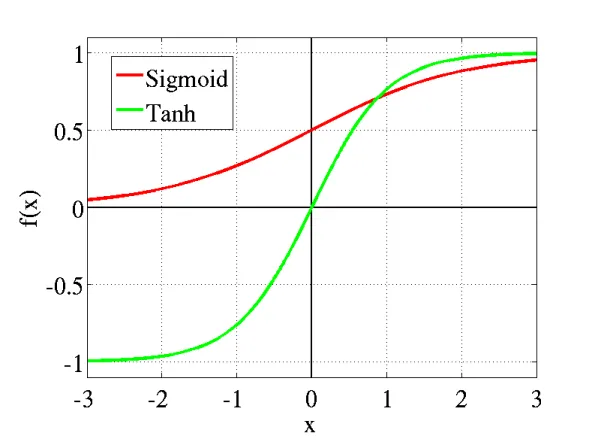
10. #### Swish
    >It is a self-gated activation function developed by researchers at Google.
    >
    >Swish consistently matches or outperforms ReLU activation function on deep networks applied to various challenging domains such as image classification, machine translation etc. 



https://en.wikipedia.org/wiki/Activation_function

## نحوه انتخاب تابع فعالسای برای لایه خروجی
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

- 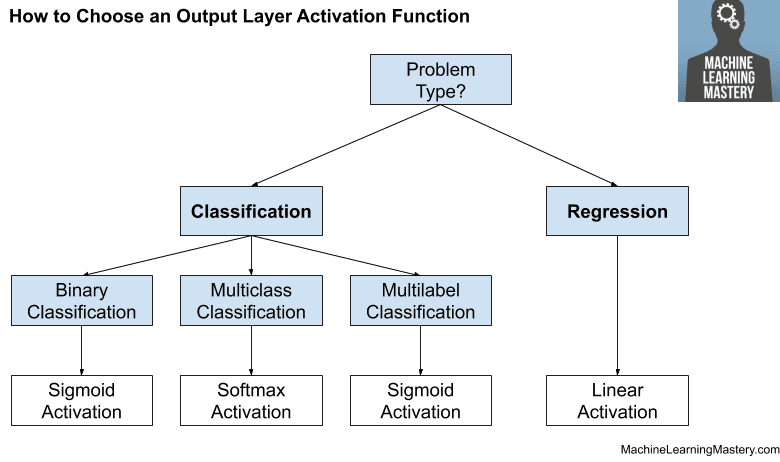
- 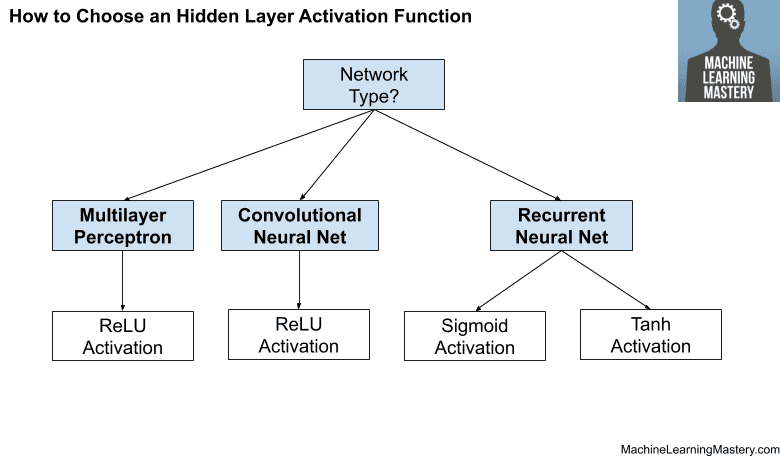

In [2]:
import torch
import torch.nn as nn

In [14]:

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size,out_size):
        super().__init__()
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [ ]:
input_size  = 28*28  # image
hidden_size = 128   

# Binary Classification
    BCEWithLogitsLoss loss combines a Sigmoid layer and the BCELoss in one single class. 


In [ ]:
# training
model = MLP(input_size, hidden_size, 1) 
optimizer = torch.optim.SGD(model.parameters(),lr=0.05) #Stochastic gradient descent
# 1
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #forward
        pred_labels = model(images)
        probabilities = torch.nn.Sigmoid(pred_labels)
        l = nn.BCELoss(probabilities, labels)
        #backward
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

# 2
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #forward
        pred_labels = model(images)
        l = nn.BCEWithLogitsLoss(pred_labels, labels)  # Sigmoid + Binary Cross-Entropy Loss 
        #backward
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

In [ ]:
#eval
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        # Apply sigmoid activation to get probabilities
        probabilities = torch.nn.Sigmoid(outputs)
        # Use probabilities for evaluation or thresholding to get predicted classes
        predicted_classes = (probabilities > 0.5).float()

# Multi-Label MLP

In [9]:
# training
model = MLP(input_size, hidden_size, 5) 
# 1
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #forward
        pred_labels = model(images)
        probabilities = torch.nn.Sigmoid(pred_labels)
        l = nn.BCELoss(probabilities, labels)
        #backward
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

# 2
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #forward
        pred_labels = model(images)
        l = nn.BCEWithLogitsLoss(pred_labels, labels)  # Sigmoid + Binary Cross-Entropy Loss 
        #backward
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

In [ ]:
#eval
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        # Apply sigmoid activation to get probabilities
        probabilities = torch.nn.Sigmoid(outputs)
        # Use probabilities for evaluation or thresholding to get predicted classes
        predicted_classes = (probabilities > 0.5).float()

# Multi-class MLP
    In PyTorch, when using nn.CrossEntropyLoss() for multiclass classification, you don't need to apply a softmax activation function to the output layer explicitly. The nn.CrossEntropyLoss() function combines the softmax function and the negative log likelihood loss into a single efficient implementation.

In [ ]:
# training
model = MLP(input_size, hidden_size, 5 ) 
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #forward
        pred_labels = model(images) 
        l = nn.CrossEntropyLoss(probabilities, labels)  # softmax + Cross-Entropy Loss
        #backward
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

In [ ]:
#eval
with torch.no_grad():
    for inputs, labels in data_loader:
        outputs = model(inputs)
        # If you want to get the predicted classes, use max along the class dimension
        _, predicted_classes = torch.max(outputs, 1)

In [ ]:
import torch.nn.functional as F

with torch.no_grad():
    for inputs, labels in data_loader:
        outputs = model(inputs)
        # Use softmax to get probabilities for each class
        probabilities = F.softmax(outputs, dim=1)
        # Get the predicted classes based on the highest probability
        _, predicted_classes = torch.max(probabilities, 1)
